## Checking read numbers for raw sequencing 

We decided to go for around 20x coverage per sample. . . which means that there is a minimum data yeild per sample that we would like to hit. It is easiest to count data yeild in N reads, so what is the required N reads per sample?

<b>Required data per sample</b>  
Genome length = 470 Mb (from assembly)  
470,000,000 bp * 20x cov = 9,400,000,000 bp (or 9.4 Gb data per sample)

<b>Required N reads per sample</b>  
Read length = 2x152  
9,400,000,000 / (2x152) = 30,921,052 reads (or <b>31 M reads per sample</b>). 




### Runs: 1, 2, 3, 4, 5 . . . 

In [167]:
def plot_read_Ns(read_N_path, outpath):
    
    """
    Simple plotting function for read number output 
    
    Input file line format:
    
    Name\tread_number\n 
    
    """
    
    from matplotlib import pyplot as plt
    import numpy as np
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = ["Times"]
    plt.rcParams["font.size"] = 12
    
    cov_dict = {}
    
    with open(read_N_path) as read_numbers:
        
        for line in read_numbers:
            
            sample = line.split()[0]
            N = int(line.split()[1])
            
            cov_dict[sample] = N
                
     
    fig, ax = plt.subplots()
    
    x_index = 0
    x_positions = []
    labels = []
    Ns = []
    N_below_20 = 0
    N_above_20 = 0

    
    for i in sorted(cov_dict.keys()):
        if "_R1_" in i:
            labels.append(i)
            x_positions.append(x_index)
            Ns.append(cov_dict[i])
            if cov_dict[i] < 31000000:
                ax.bar(x_index, cov_dict[i], color = "orange")
                N_below_20 += 1
            elif cov_dict[i] > 31000000:
                ax.bar(x_index, cov_dict[i], color = "black")
                N_above_20 += 1
                
            #print(x_index, cov_dict[i])
            x_index += 1
            
    ax.hlines(31000000,0,max(x_positions), color = "red", linestyle = "dashed")
    ax.hlines(np.mean(Ns), 0,max(x_positions), color = "blue")
    
    ax.text(0, 125000000, "N samples: %s" % len(labels), fontsize = 16, color = "black")
    ax.text(0, 120000000, "Target read count: 31M reads", fontsize = 16, color = "red")
    ax.text(0, 115000000, "Mean read count: %sM reads" % np.round((np.mean(Ns)/1000000),1), fontsize = 16, color = "blue")
    ax.text(0, 110000000, "N samples > 31M: %s" % N_above_20, fontsize = 16)
    ax.text(0, 105000000, "N samples < 31M: %s" % N_below_20, fontsize = 16)
    
    ax.set_xticks(x_positions)
    ax.set_xticklabels(["".join(i.split("_")[:3]) for i in labels], rotation = "vertical", fontsize = 4)
    
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(list(range(0,160,20)))
    
    plt.xlabel("Sample")
    plt.ylabel("Raw read count (Millions)")
    
    plt.savefig(outpath)
    plt.show()
    

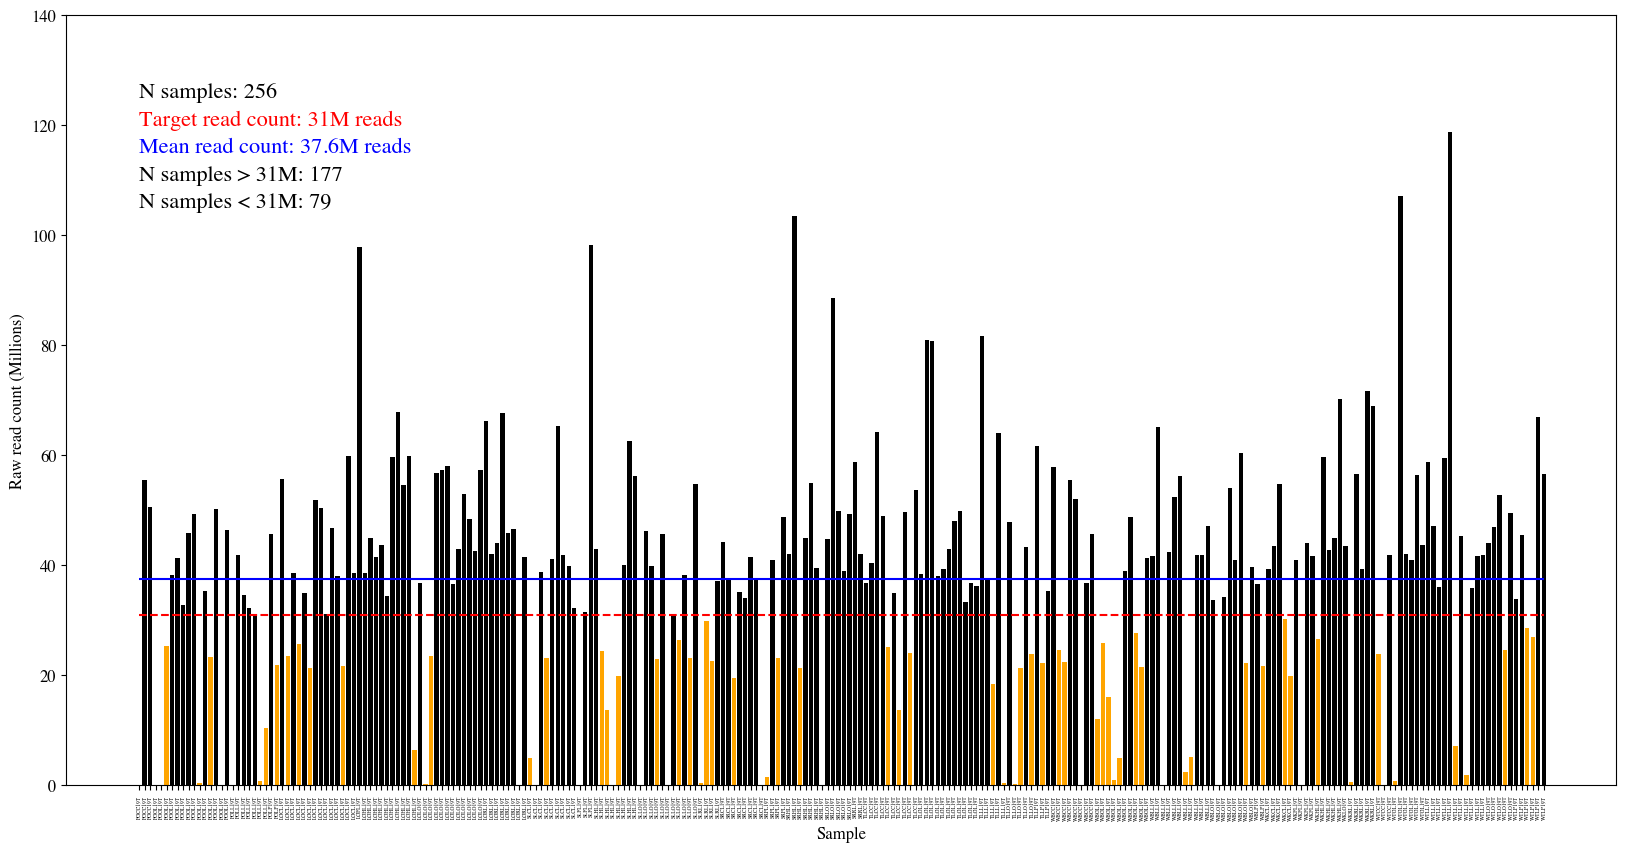

In [168]:
inpath = "/Users/dj20y461/Data_temp/Stickleback/FITNESS/plot_data/read_numbers_R1-5.tsv"
pdfoutpath = "/Users/dj20y461/Data_temp/Stickleback/FITNESS/plots/read_numbers_R1-R5.pdf"
plot_read_Ns(inpath, pdfoutpath)
